# Evaluation of Statistics Differences

Visualization of evaluation results comparing mean statistics differences of background traffic and background traffic combined with selected traces.


#### Selected mean statistics files:
- [conv_statistics.csv](#Statistics-File:-conv_statistics.csv)
- [interval_statistics.csv](#Statistics-File:-interval_statistics.csv)
- [ip_ports.csv](#Statistics-File:-ip_ports.csv)
- [ip_protocols.csv](#Statistics-File:-ip_protocols.csv)
- [ip_statistics.csv](#Statistics-File:-ip_statistics.csv)
- [ip_tos.csv](#Statistics-File:-ip_tos.csv)
- [ip_ttl.csv](#Statistics-File:-ip_ttl.csv)
- [tcp_mss.csv](#Statistics-File:-tcp_mss.csv)
- [tcp_win.csv](#Statistics-File:-tcp_win.csv)
- [unrecognized_pdus.csv](#Statistics-File:-unrecognized_pdus.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
def print_stats(statistics):
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    
    plt.gcf().clear()
    fig = plt.figure(figsize=(13.6, 3.7 * len(statistics.columns)))
    gs = gridspec.GridSpec(len(statistics.columns),4)
    
    column_num = 0
    for column in statistics.columns:
        try:
            stats = statistics[column].values

            ax1 = fig.add_subplot(gs[column_num, :3])            
            ax1.autoscale(enable=True, axis='both')
            ax1.set_title(column)
            q= (max(stats)-min(stats))*0.1
            ax1.set_ylim([min(stats)-q, max(stats)+q])
            ax1.stem(stats, bottom=0, use_line_collection=True)
            ax1.set_xlabel("trace type")
            ax1.set_ylabel('entropy dif')
            ax1.set_xticks([i for i in range(0, len(stats), 5)], None)

            ax2 = fig.add_subplot(gs[column_num, 3], sharey=ax1)
            ax2.set_title(column)
            ax2.boxplot(statistics[column])
            
            column_num += 1
        except ValueError:
            continue
    
    plt.tight_layout(h_pad=3)
    plt.show()

## Statistics File: conv_statistics.csv

In [3]:
conv_statistics = pd.read_csv('./statistics-difference/mean/conv_statistics.csv')
display(conv_statistics)

,pktsCount,avgPktRate,avgDelay,minDelay,maxDelay,roundTripTime
0,-0.000262,NaN,-16.948524,-21.196512,-14.550657,9.518976
1,-0.000122,NaN,-6.628203,-7.062572,-6.810549,1.216037
2,0.105513,NaN,-19.245608,-18.828562,-21.307213,0.100996
3,0.000200,NaN,-14.645779,-18.837455,-12.098667,9.300649
4,0.000344,NaN,-2.005983,-2.352544,-1.864996,0.812229
...,...,...,...,...,...,...
130,0.105513,NaN,-19.245608,-18.828562,-21.307213,0.100996
131,0.000200,NaN,-14.664907,-18.840067,-12.134280,9.262423
132,0.000344,NaN,-2.007764,-2.354418,-1.866684,0.808667
133,-0.000032,NaN,-2.259299,-2.354149,-2.370027,0.305592


<Figure size 432x288 with 0 Axes>

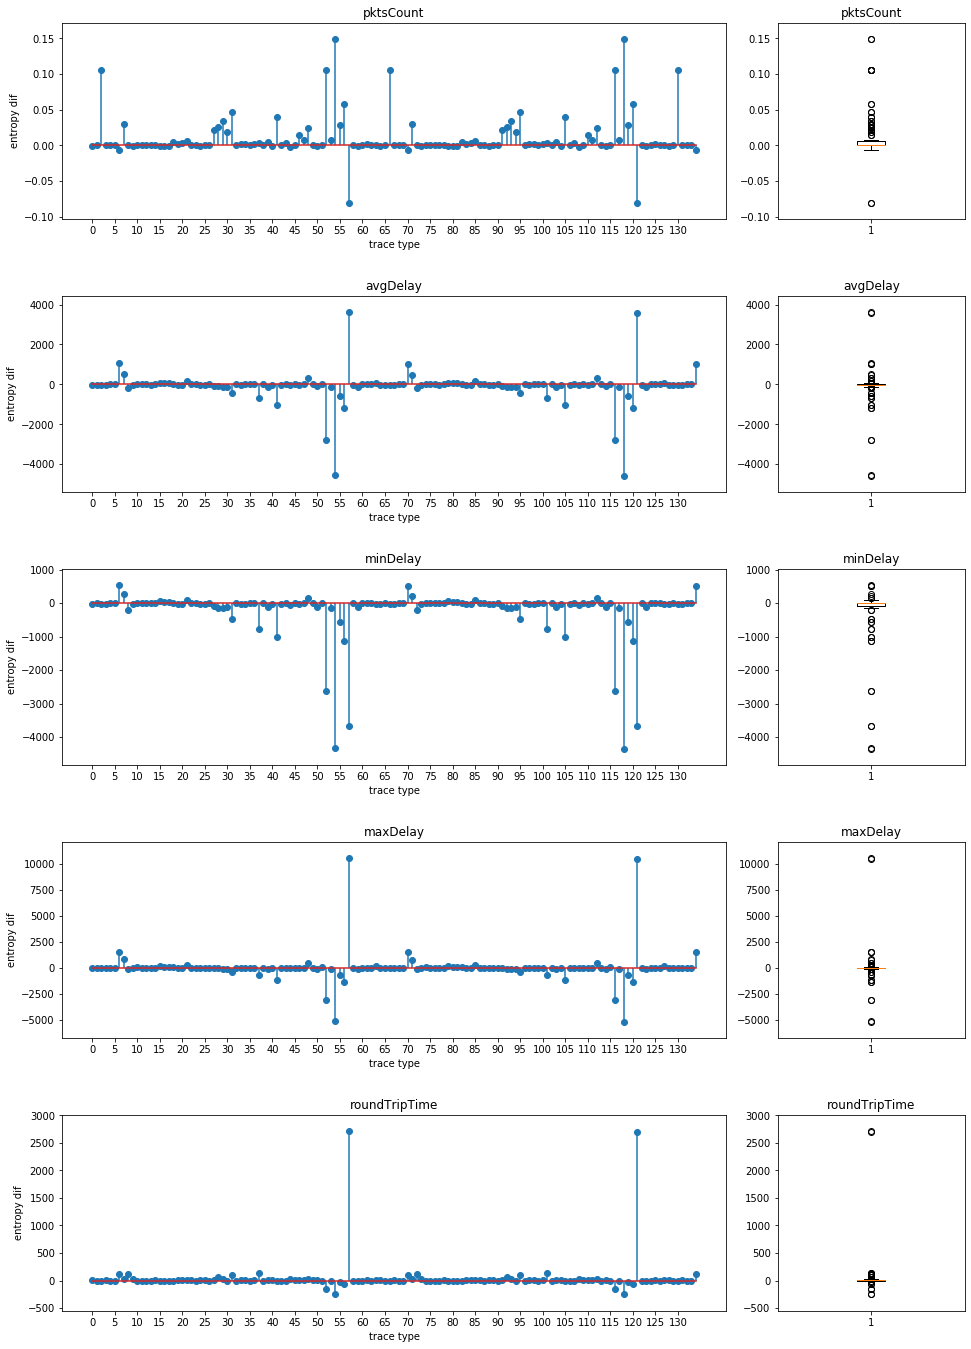

In [4]:
print_stats(conv_statistics)

## Statistics File: interval_statistics.csv

In [5]:
interval_statistics = pd.read_csv('./statistics-difference/mean/interval_statistics.csv')
display(interval_statistics)

,pkts_count,pkt_rate,kBytes,kByte_rate,ip_src_entropy,ip_dst_entropy,ip_src_cum_entropy,ip_dst_cum_entropy,payload_count,incorrect_tcp_checksum_count,...,tos_novel_entropy_normalized,mss_novel_entropy_normalized,ip_src_entropy_normalized,ip_dst_entropy_normalized,ip_src_cum_entropy_normalized,ip_dst_cum_entropy_normalized,ip_src_novel_entropy,ip_dst_novel_entropy,ip_src_novel_entropy_normalized,ip_dst_novel_entropy_normalized
0,0.96,0.002812,0.137578,0.000404,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.722620e-07,-7.739846e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.35,0.001025,0.037734,0.000111,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.048330e-07,2.048114e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,217.32,0.636544,120.682734,0.353487,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.141880e-04,-3.155874e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.78,0.005214,0.392539,0.001151,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.590834e-06,-3.155874e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.89,0.002607,0.782539,0.002293,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.298802e-06,2.826908e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,217.32,0.636544,120.682813,0.353488,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.141880e-04,-3.155874e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,1.78,0.005214,0.392578,0.001151,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.590834e-06,-3.155874e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.89,0.002607,0.782539,0.002293,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.298802e-06,2.826908e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,1.36,0.003983,0.132539,0.000388,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.484291e-06,2.826908e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

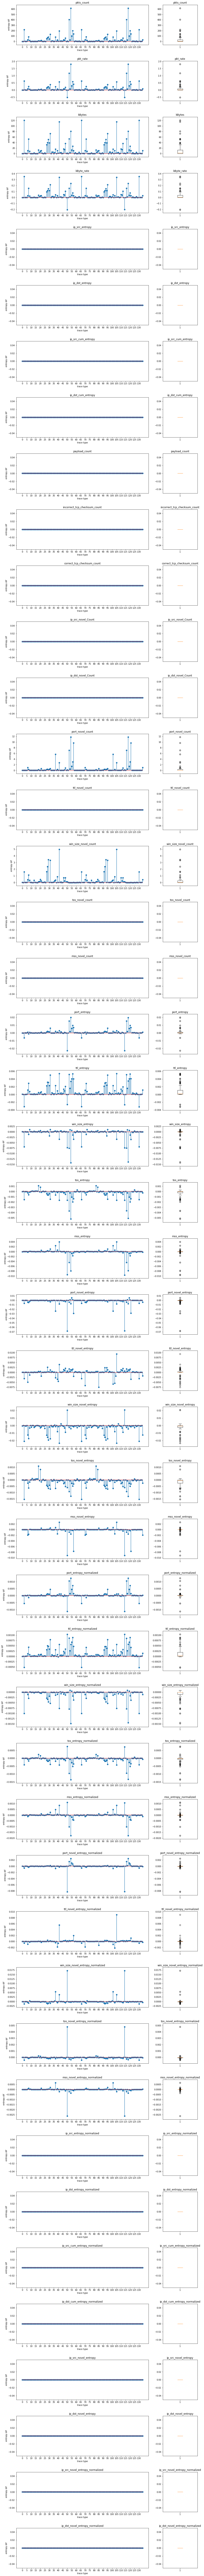

In [6]:
print_stats(interval_statistics)

## Statistics File: ip_ports.csv

In [7]:
ip_ports = pd.read_csv('./statistics-difference/mean/ip_ports.csv')
display(ip_ports)

,portNumber,portCount,byteCount
0,-2.336231,-0.000441,-0.302729
1,-0.445453,-0.000555,-0.280118
2,-3.916425,0.103762,60.427383
3,-2.818653,-0.000224,-0.248529
4,-0.710288,0.000160,0.287600
...,...,...,...
132,-3.916425,0.103762,60.427383
133,-2.818653,-0.000224,-0.248529
134,-0.710288,0.000160,0.287600
135,-0.709556,0.000387,-0.045701


<Figure size 432x288 with 0 Axes>

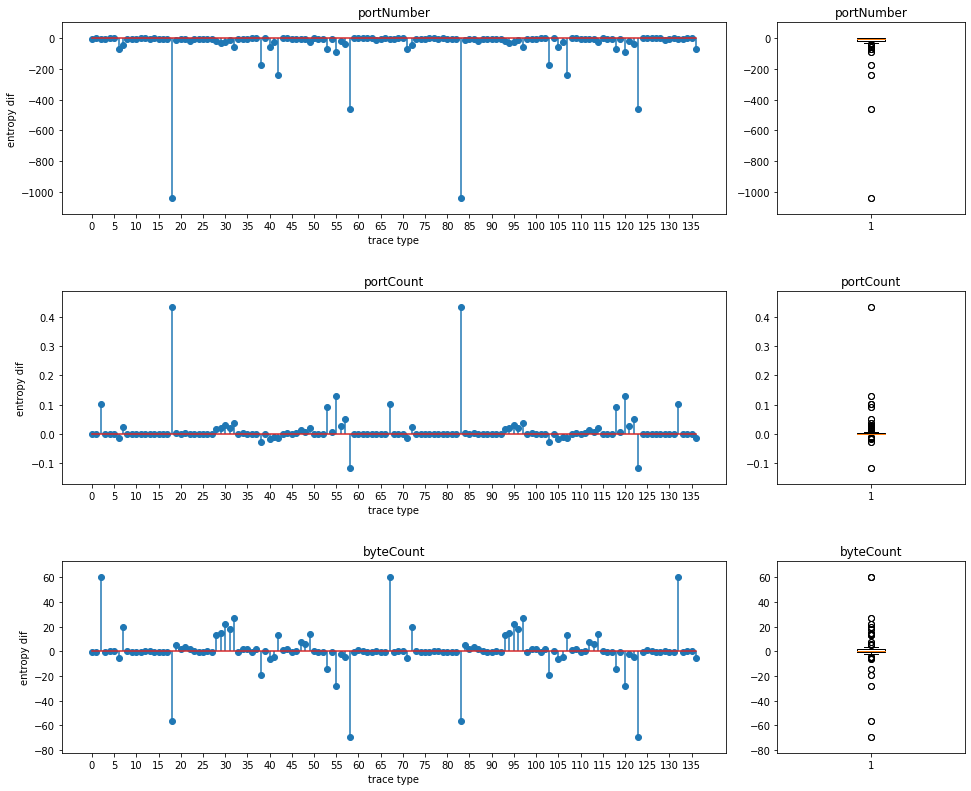

In [8]:
print_stats(ip_ports)

## Statistics File: ip_protocols.csv

In [9]:
ip_protocols = pd.read_csv('./statistics-difference/mean/ip_protocols.csv')
display(ip_protocols)

,protocolCount,byteCount
0,0.008865,1.311017
1,-0.029717,-13.176314
2,1.924009,1129.505960
3,-0.016513,-9.743996
4,-0.008257,0.844569
...,...,...
130,1.924009,1129.505960
131,-0.016513,-9.743996
132,-0.008257,0.844569
133,-0.003917,-5.497875


<Figure size 432x288 with 0 Axes>

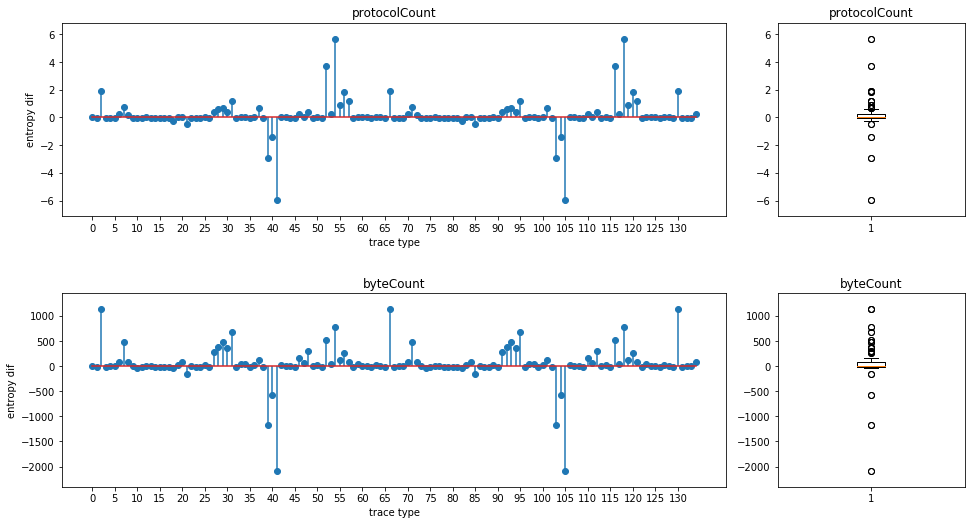

In [10]:
print_stats(ip_protocols)

## Statistics File: ip_statistics.csv

In [11]:
ip_statistics = pd.read_csv('./statistics-difference/mean/ip_statistics.csv')
display(ip_statistics)

,pktsReceived,pktsSent,kbytesReceived,kbytesSent,maxPktRate,minPktRate
0,0.008916,0.008916,0.001288,0.001288,0.000000,0.0
1,0.003251,0.003251,0.000319,0.000320,0.000000,0.0
2,2.018390,2.018390,1.142833,1.142799,0.002350,0.0
3,0.016532,0.016532,0.003692,0.003692,0.000000,0.0
4,0.008266,0.008266,0.007478,0.007461,0.000000,0.0
...,...,...,...,...,...,...
126,2.018390,2.018390,1.142833,1.142799,0.002350,0.0
127,0.016532,0.016532,0.003692,0.003692,0.000000,0.0
128,0.008266,0.008266,0.007478,0.007461,0.000000,0.0
129,0.012631,0.012631,0.001234,0.001233,0.000000,0.0


<Figure size 432x288 with 0 Axes>

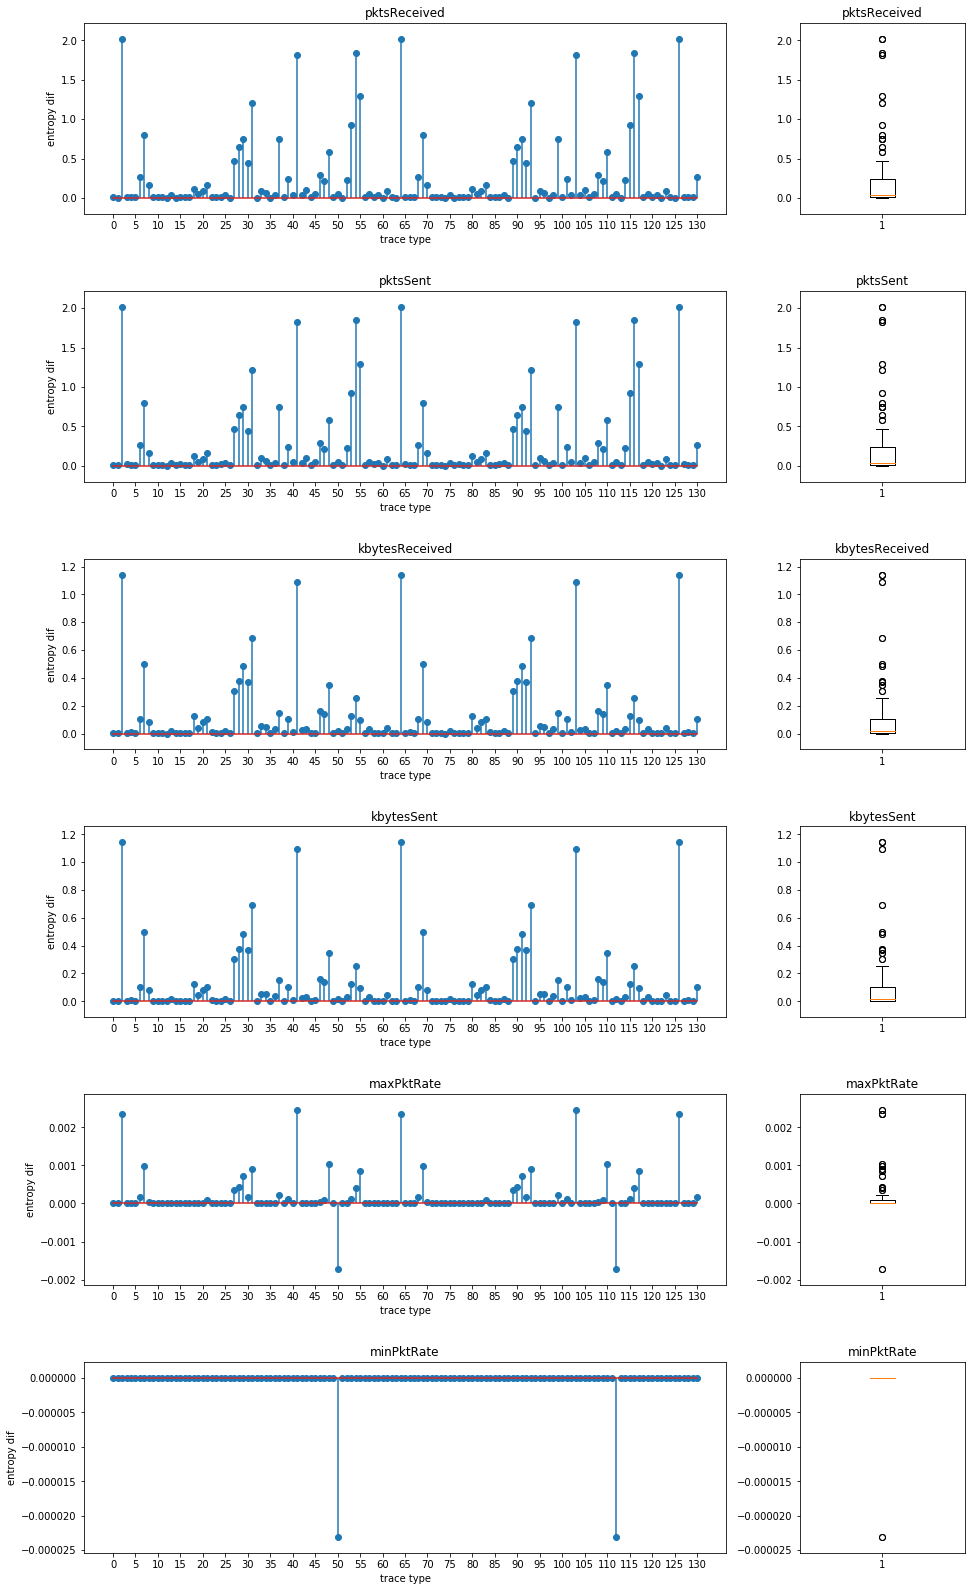

In [12]:
print_stats(ip_statistics)

## Statistics File: ip_tos.csv

In [13]:
ip_tos = pd.read_csv('./statistics-difference/mean/ip_tos.csv')
display(ip_tos)

,tosValue,tosCount
0,0.000000,0.008469
1,0.000000,0.003088
2,-0.001336,1.856628
3,0.000000,0.015702
4,0.000000,0.007851
...,...,...
130,-0.001336,1.856628
131,0.000000,0.015702
132,0.000000,0.007851
133,0.000000,0.011997


<Figure size 432x288 with 0 Axes>

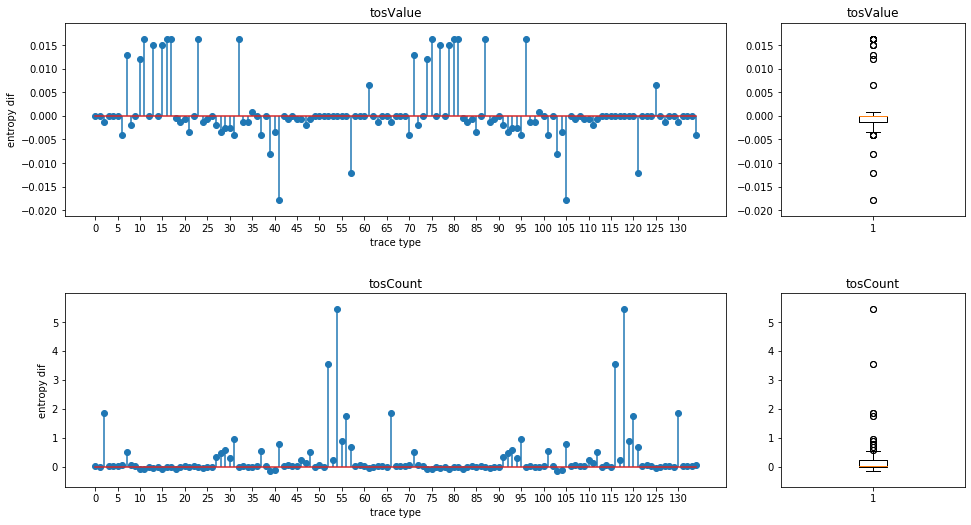

In [14]:
print_stats(ip_tos)

## Statistics File: ip_ttl.csv

In [15]:
ip_ttl = pd.read_csv('./statistics-difference/mean/ip_ttl.csv')
display(ip_ttl)

,ttlValue,ttlCount
0,0.0,0.006906
1,0.0,0.002518
2,0.0,1.563341
3,0.0,0.012805
4,0.0,0.006402
...,...,...
132,0.0,1.563341
133,0.0,0.012805
134,0.0,0.006402
135,0.0,0.009783


<Figure size 432x288 with 0 Axes>

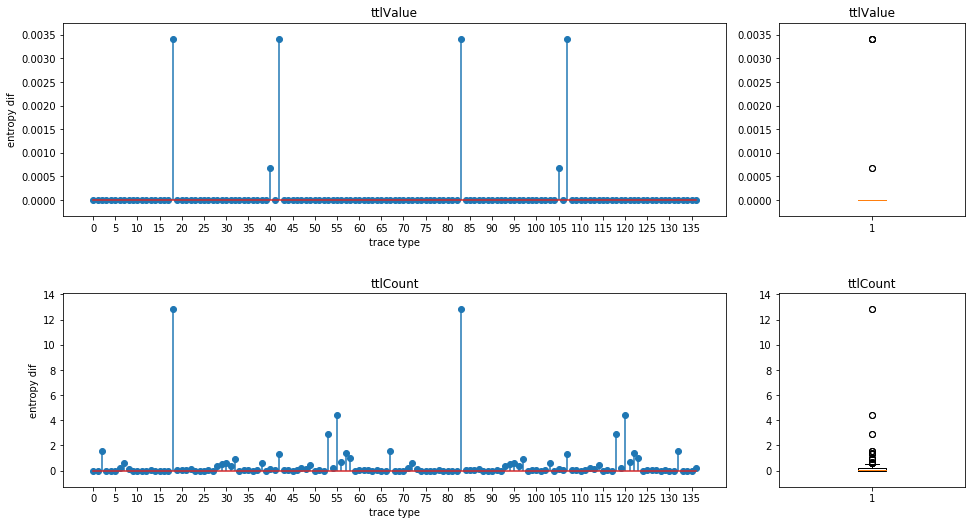

In [16]:
print_stats(ip_ttl)

## Statistics File: tcp_mss.csv

In [17]:
tcp_mss = pd.read_csv('./statistics-difference/mean/tcp_mss.csv')
display(tcp_mss)

,mssValue,mssCount
0,0.0,0.002540
1,0.0,0.000847
2,0.0,0.002258
3,0.0,0.002258
4,0.0,0.000282
...,...,...
132,0.0,0.002258
133,0.0,0.002258
134,0.0,0.000282
135,0.0,0.000282


<Figure size 432x288 with 0 Axes>

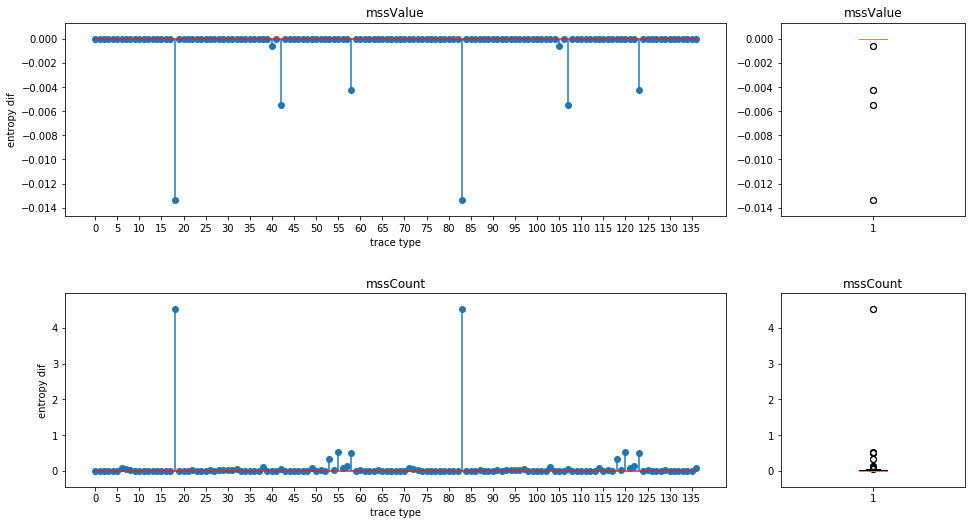

In [18]:
print_stats(tcp_mss)

## Statistics File: tcp_win.csv

In [19]:
tcp_win = pd.read_csv('./statistics-difference/mean/tcp_win.csv')
display(tcp_win)

,winSize,winCount
0,0.959008,0.000296
1,-0.317652,-0.000955
2,75.899703,0.068542
3,1.434847,0.000723
4,2.704372,-0.000974
...,...,...
132,75.899703,0.068542
133,1.434847,0.000723
134,2.704372,-0.000974
135,0.959694,-0.000501


<Figure size 432x288 with 0 Axes>

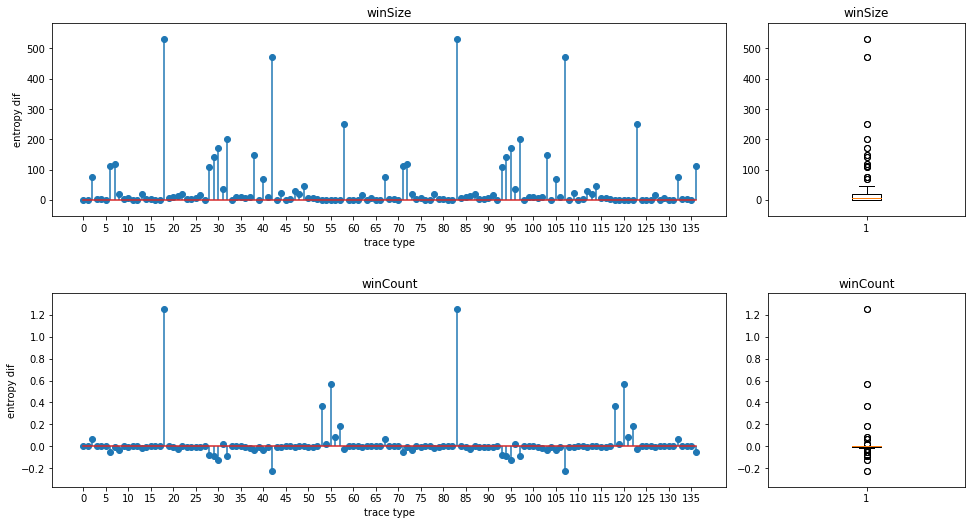

In [20]:
print_stats(tcp_win)

## Statistics File: unrecognized_pdus.csv

In [21]:
unrecognized_pdus = pd.read_csv('./statistics-difference/mean/unrecognized_pdus.csv')
display(unrecognized_pdus)

,pktCount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
132,0.0
133,0.0
134,0.0
135,0.0


<Figure size 432x288 with 0 Axes>

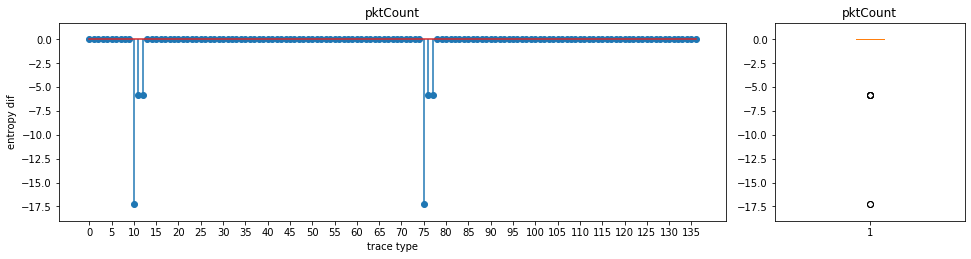

In [22]:
print_stats(unrecognized_pdus)